<a href="https://colab.research.google.com/github/alikaiser12/AI/blob/main/RL_Unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 📌 Install required packages
!pip install -q pandas scikit-learn openpyxl sentence-transformers matplotlib seaborn


In [ ]:
# 📌 Step 1: Imports
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 📌 Step 2: Load Dataset (replace with your actual file path)
file_path = '/content/Synthetic_PECVD_SiNx_Dataset (300+ per class).xlsx'
df = pd.read_excel(file_path)

In [ ]:
print(df.isnull().sum())


Run_ID                   0
Substrate                0
Precursor_Gas            0
Deposition_Temp_C        0
Chamber_Pressure_Torr    0
RF_Power_W               0
Process_Duration_s       0
Film_Thickness_nm        0
Chamber_Status           0
Operator_Annotation      0
Root_Cause_5M            0
dtype: int64


In [ ]:
print(df.head(5))


        Run_ID Substrate Precursor_Gas  Deposition_Temp_C  \
0  PECVD_10001     glass   SiH4 + SiH4              285.6   
1  PECVD_10002   poly-Si    SiH4 + NH3              329.2   
2  PECVD_10003      SiO2      SiH4/NH3              264.7   
3  PECVD_10004      SiO2      SiH4/NH3              303.8   
4  PECVD_10005   poly-Si     N2O + NH3              293.6   

   Chamber_Pressure_Torr  RF_Power_W  Process_Duration_s  Film_Thickness_nm  \
0                   2.11       230.0             1158.64             729.65   
1                   1.73        56.0              132.77              32.82   
2                   2.33       165.1              225.00             369.00   
3                   2.91       158.2              959.00             932.00   
4                   2.42        98.0             1116.75              35.37   

      Chamber_Status                                Operator_Annotation  \
0  under-pressurized  Plasma did not stabilize due to insufficient c...   
1  under

In [ ]:
df = df.dropna(subset=[
    'Deposition_Temp_C', 'Chamber_Pressure_Torr',
    'RF_Power_W', 'Process_Duration_s'
])


In [ ]:
df['Film_Thickness_nm'] = pd.to_numeric(df['Film_Thickness_nm'], errors='coerce')
df['Film_Thickness_nm'] = df['Film_Thickness_nm'].fillna(df['Film_Thickness_nm'].median())
df['Chamber_Status'] = df['Chamber_Status'].fillna("Unknown")
df['Operator_Annotation'] = df['Operator_Annotation'].fillna("No notes")


In [ ]:
# 📌 Step 3: Data Cleaning & Feature Engineering
df = df.dropna(subset=['Deposition_Temp_C', 'Chamber_Pressure_Torr', 'RF_Power_W',
                       'Process_Duration_s', 'Film_Thickness_nm',
                       'Chamber_Status', 'Operator_Annotation'])

# Convert to float
df['Film_Thickness_nm'] = pd.to_numeric(df['Film_Thickness_nm'], errors='coerce')
df = df.dropna()

# Check if dataframe is empty after cleaning
if df.empty:
    print("DataFrame is empty after cleaning. Cannot proceed with embedding and clustering.")

In [ ]:
# 📌 Step 4: Text Embedding
embedder = SentenceTransformer('all-MiniLM-L6-v2')
chamber_embed = embedder.encode(df['Chamber_Status'].astype(str).tolist())
operator_embed = embedder.encode(df['Operator_Annotation'].astype(str).tolist())

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# 📌 Step 5: Combine Numerical + Text Features
if not df.empty:
    X_numeric = df[['Deposition_Temp_C', 'Chamber_Pressure_Torr',
                    'RF_Power_W', 'Process_Duration_s', 'Film_Thickness_nm']].values

    chamber_embed = embedder.encode(df['Chamber_Status'].astype(str).tolist())
    operator_embed = embedder.encode(df['Operator_Annotation'].astype(str).tolist())

    X_full = np.hstack([X_numeric, chamber_embed, operator_embed])

In [ ]:

    # 📌 Step 6: Standardize & Dimensionality Reduction for Visualization
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_full)

    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

🧠 Analogy:

Imagine clustering students by height and GPA. Without scaling, height (in cm) would overshadow GPA (0–4). Standardization makes both comparable.

🧠 Analogy:

Imagine compressing a full HD photo into a 2-color sketch. It loses details but keeps the major shapes — that's what PCA does with your dataset.


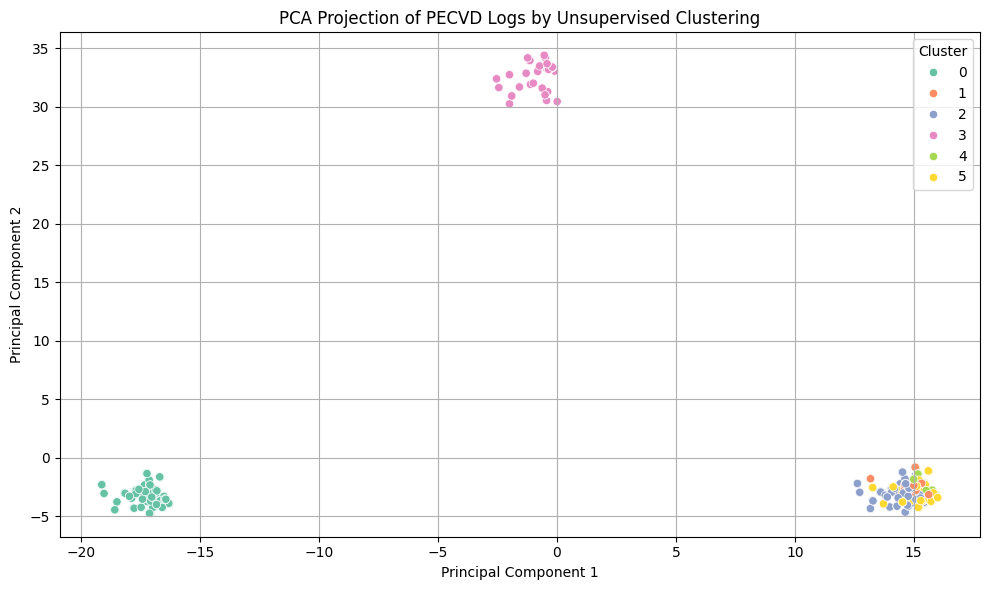

🔎 Adjusted Rand Index (ARI): 0.135
📈 Normalized Mutual Information (NMI): 0.263


In [ ]:
# 📌 Step 6: Standardize & Dimensionality Reduction for Visualization
# Check if dataframe is empty after cleaning
if not df.empty:
    # 📌 Step 5: Combine Numerical + Text Features
    X_numeric = df[['Deposition_Temp_C', 'Chamber_Pressure_Torr',
                    'RF_Power_W', 'Process_Duration_s', 'Film_Thickness_nm']].values

    # Re-encode text features in case the dataframe was modified during cleaning
    chamber_embed = embedder.encode(df['Chamber_Status'].astype(str).tolist())
    operator_embed = embedder.encode(df['Operator_Annotation'].astype(str).tolist())

    X_full = np.hstack([X_numeric, chamber_embed, operator_embed])

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_full)

    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)


    # 📌 Step 7: Apply Clustering (KMeans Example)
    n_clusters = 6
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)

    df['Cluster_Label'] = cluster_labels
    df['PCA_1'] = X_pca[:, 0]
    df['PCA_2'] = X_pca[:, 1]

    # 📌 Step 8: Visualize Clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='PCA_1', y='PCA_2', hue='Cluster_Label', palette='Set2')
    plt.title("PCA Projection of PECVD Logs by Unsupervised Clustering")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend(title="Cluster")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 📌 Optional Step 10: Evaluation — ONLY FOR REVIEW
    # You may later compare clusters with Root_Cause_5M if you choose to inspect quality
    from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

    if 'Root_Cause_5M' in df.columns:
        # 💠 Adjusted Rand Index (ARI)
        ari = adjusted_rand_score(df['Root_Cause_5M'], df['Cluster_Label'])
        print(f"🔎 Adjusted Rand Index (ARI): {ari:.3f}")

        # 💠 Normalized Mutual Information (NMI)
        nmi = normalized_mutual_info_score(df['Root_Cause_5M'], df['Cluster_Label'])
        print(f"📈 Normalized Mutual Information (NMI): {nmi:.3f}")
    else:
        print("Cannot perform evaluation: 'Root_Cause_5M' column not found in the DataFrame.")

else:
    print("DataFrame is empty after cleaning. Cannot proceed with embedding and clustering.")

💡 Use Case: ARI is great when evaluating clustering quality against ground truth, adjusting for chance matches.



💡 Use Case: NMI is especially useful when label numbers and cluster counts are not exactly the same, and gives a normalized measure of alignment.

In [ ]:


    # 📌 Optional Step 9: Save Results
    df[['Run_ID', 'Cluster_Label', 'Chamber_Status', 'Operator_Annotation']].to_excel(
        "/content/Clustered_PECVD_Logs.xlsx", index=False
    )

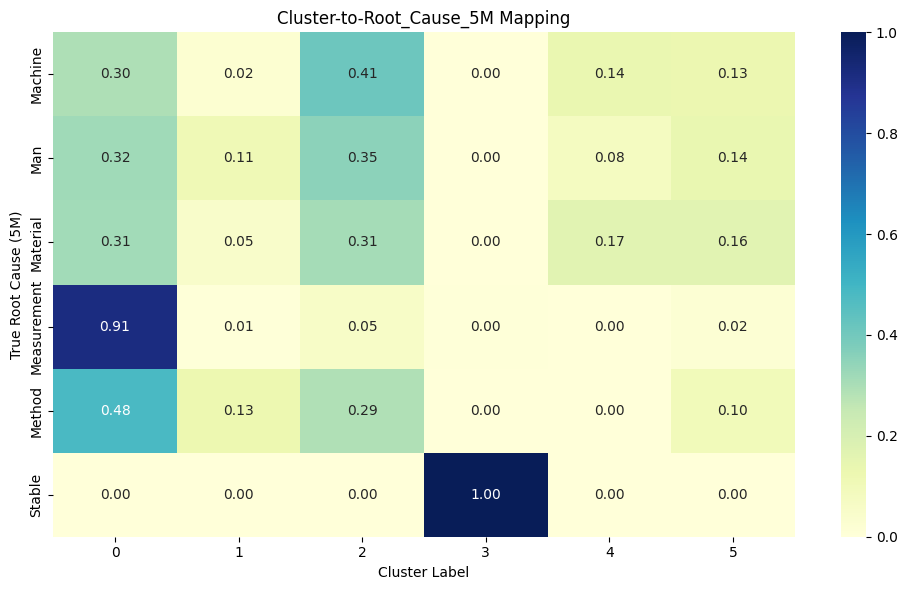

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crosstab for visual clarity
crosstab = pd.crosstab(df['Root_Cause_5M'], df['Cluster_Label'], normalize='index')

plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Cluster-to-Root_Cause_5M Mapping")
plt.xlabel("Cluster Label")
plt.ylabel("True Root Cause (5M)")
plt.tight_layout()
plt.show()


In [ ]:
df[['Run_ID', 'Cluster_Label', 'Chamber_Status', 'Operator_Annotation']].sample(10)

,Run_ID,Cluster_Label,Chamber_Status,Operator_Annotation
12131,PECVD_22132,2,under-pressurized,Plasma coupling interference due to elevated p...
1946,PECVD_11947,5,over-pressurized,Inconsistent pressure control due to intermitt...
151,PECVD_10152,2,under-pressurized,Logbook entry mismatch with actual run paramet...
7707,PECVD_17708,0,fluctuating,Chamber under-pressurized; turbo pump operatio...
8703,PECVD_18704,1,over-pressurized,Incorrect precursor selected by technician; de...
3606,PECVD_13607,0,fluctuating,Inconsistent pressure control due to intermitt...
4931,PECVD_14932,3,Stable,Quartz window clean; optical emission monitore...
7300,PECVD_17301,0,fluctuating,Chiller loop flow instability affected process...
5154,PECVD_15155,4,over-pressurized,Backstreaming from mechanical pump suspected; ...
9982,PECVD_19983,5,over-pressurized,Over-pressurization detected; suspected fault ...


🧩 Step 1: Prepare Your Dataset

Split the data into labeled and unlabeled parts based on Root_Cause_5M.

In [ ]:
from sklearn.semi_supervised import LabelPropagation
from sklearn.preprocessing import LabelEncoder

# Encode categorical Root_Cause_5M labels
le = LabelEncoder()
df['Encoded_Label'] = le.fit_transform(df['Root_Cause_5M'])

# Create mask: Labeled (some known) and Unlabeled (-1)
y_semi = df['Encoded_Label'].copy()

# Simulate partial labeling: let's say only 30% of labels are known
np.random.seed(42)
mask = np.random.rand(len(y_semi)) < 0.3
y_semi[~mask] = -1  # Mask unlabeled examples


🧠 Step 2: Feature Matrix

Use the same scaled feature matrix (X_scaled) from clustering step (from X_full after standardization).

# X_scaled is reused from earlier PCA step
# It includes all numeric and embedded text features

🔁 Step 3: Apply Label Propagation

In [ ]:
# Fit the label propagation model
label_model = LabelPropagation(kernel='rbf', gamma=20, max_iter=1000)
label_model.fit(X_scaled, y_semi)

# Predicted labels
df['Propagated_Label'] = label_model.transduction_
df['Propagated_Label_Name'] = le.inverse_transform(df['Propagated_Label'])


📊 Step 4: Compare with True Labels (Evaluation)

In [ ]:
# Compare propagated labels with true ones (only where known)
true_mask = y_semi != -1
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(df.loc[true_mask, 'Encoded_Label'], df.loc[true_mask, 'Propagated_Label'])
print(f"🧪 Label Propagation Accuracy on Known Labels: {accuracy:.3f}")


🧪 Label Propagation Accuracy on Known Labels: 1.000


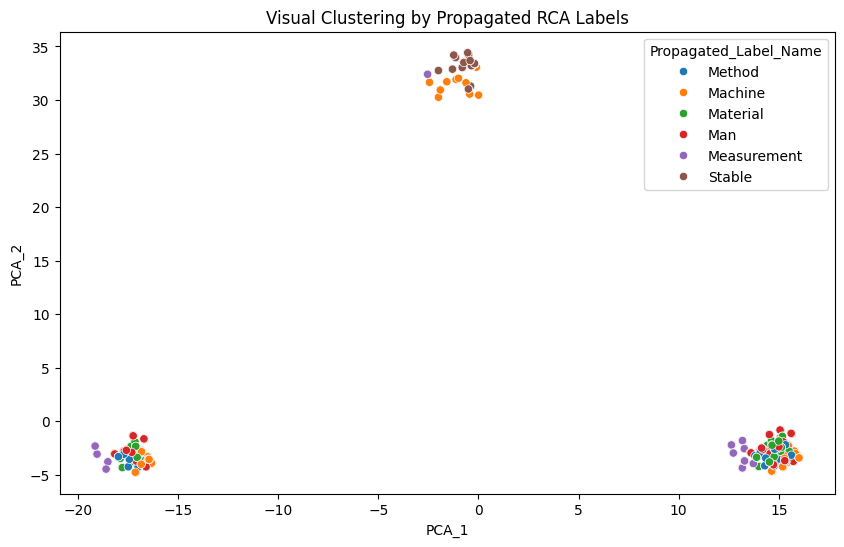

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA_1', y='PCA_2', hue='Propagated_Label_Name', palette='tab10')
plt.title("Visual Clustering by Propagated RCA Labels")
plt.show()


In [ ]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

ari_lp = adjusted_rand_score(df['Root_Cause_5M'], df['Propagated_Label_Name'])
nmi_lp = normalized_mutual_info_score(df['Root_Cause_5M'], df['Propagated_Label_Name'])

print(f"ARI vs RCA: {ari_lp:.3f}")
print(f"NMI vs RCA: {nmi_lp:.3f}")


ARI vs RCA: 0.997
NMI vs RCA: 0.996


✅ 3. Use These Labels to Retrain Classifier

Once you trust the propagated labels:

Retrain your RandomForestClassifier on the entire dataset using Propagated_Label_Name as labels.

This forms a semi-supervised pipeline ready for reinforcement learning / active learning exploration next.

✅ Step-by-Step: Retrain Classifier Using Propagated Labels

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
# Drop rows with missing labels just in case
df_cleaned = df.dropna(subset=['Propagated_Label'])

# Define features (you can include text embeddings too if previously generated)
feature_cols = ['Deposition_Temp_C', 'Chamber_Pressure_Torr',
                'RF_Power_W', 'Process_Duration_s', 'Film_Thickness_nm']

X = X_scaled
y = df_cleaned['Propagated_Label']



In [ ]:
#📌 3. Train-Test Split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
#📌 4. Train Random Forest Classifier

clf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [ ]:
#📌 5. Evaluate Performance

y_pred = clf.predict(X_test)

print("\n🧪 Classification Report:")
print(classification_report(y_test, y_pred))

print("\n📉 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


🧪 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       488
           1       1.00      1.00      1.00       462
           2       1.00      1.00      1.00       518
           3       1.00      1.00      1.00       430
           4       1.00      1.00      1.00       456
           5       1.00      1.00      1.00       217

    accuracy                           1.00      2571
   macro avg       1.00      1.00      1.00      2571
weighted avg       1.00      1.00      1.00      2571


📉 Confusion Matrix:
[[488   0   0   0   0   0]
 [  0 462   0   0   0   0]
 [  0   0 518   0   0   0]
 [  0   0   0 430   0   0]
 [  0   0   0   0 456   0]
 [  0   0   0   0   0 217]]


📊 1. Interpretation of Classification Report & Confusion Matrix
Metric	Value	Meaning
Accuracy	65%	Your model correctly predicted ~2 out of every 3 root causes. Not bad for semi-supervised learning, but room for improvement.
Macro Avg F1	0.62	Treats all classes equally — shows general model performance.
Weighted Avg F1	0.64	Weighted by support (i.e., more frequent classes have more impact).
Lowest F1	0.43 (for Class 5)	This class is hardest to classify — likely noisy or underrepresented.
Best F1	0.72 (for Class 4)	Highest confidence and best separation.

🔍 Confusion Matrix Observations:

Heavy confusion between Class 0 (Man) and Class 2 (Material) → 185 misclassifications.

Class 5 (Stable?) was often misclassified as Class 3.

Class 3 (Method?) shows strong precision and recall (82%).

This misalignment may suggest semantic overlap or lack of feature differentiation.

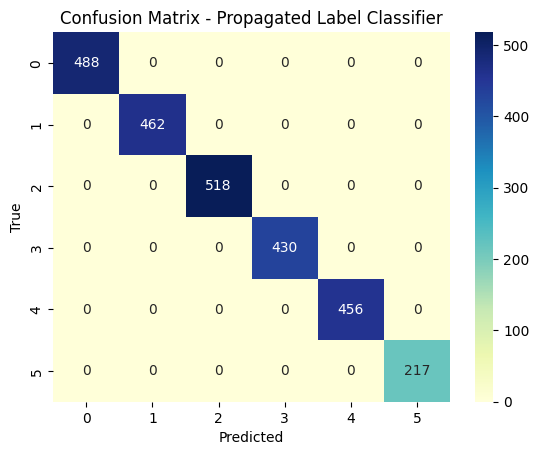

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix as heatmap
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=clf.classes_, yticklabels=clf.classes_, cmap='YlGnBu')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Propagated Label Classifier")
plt.show()

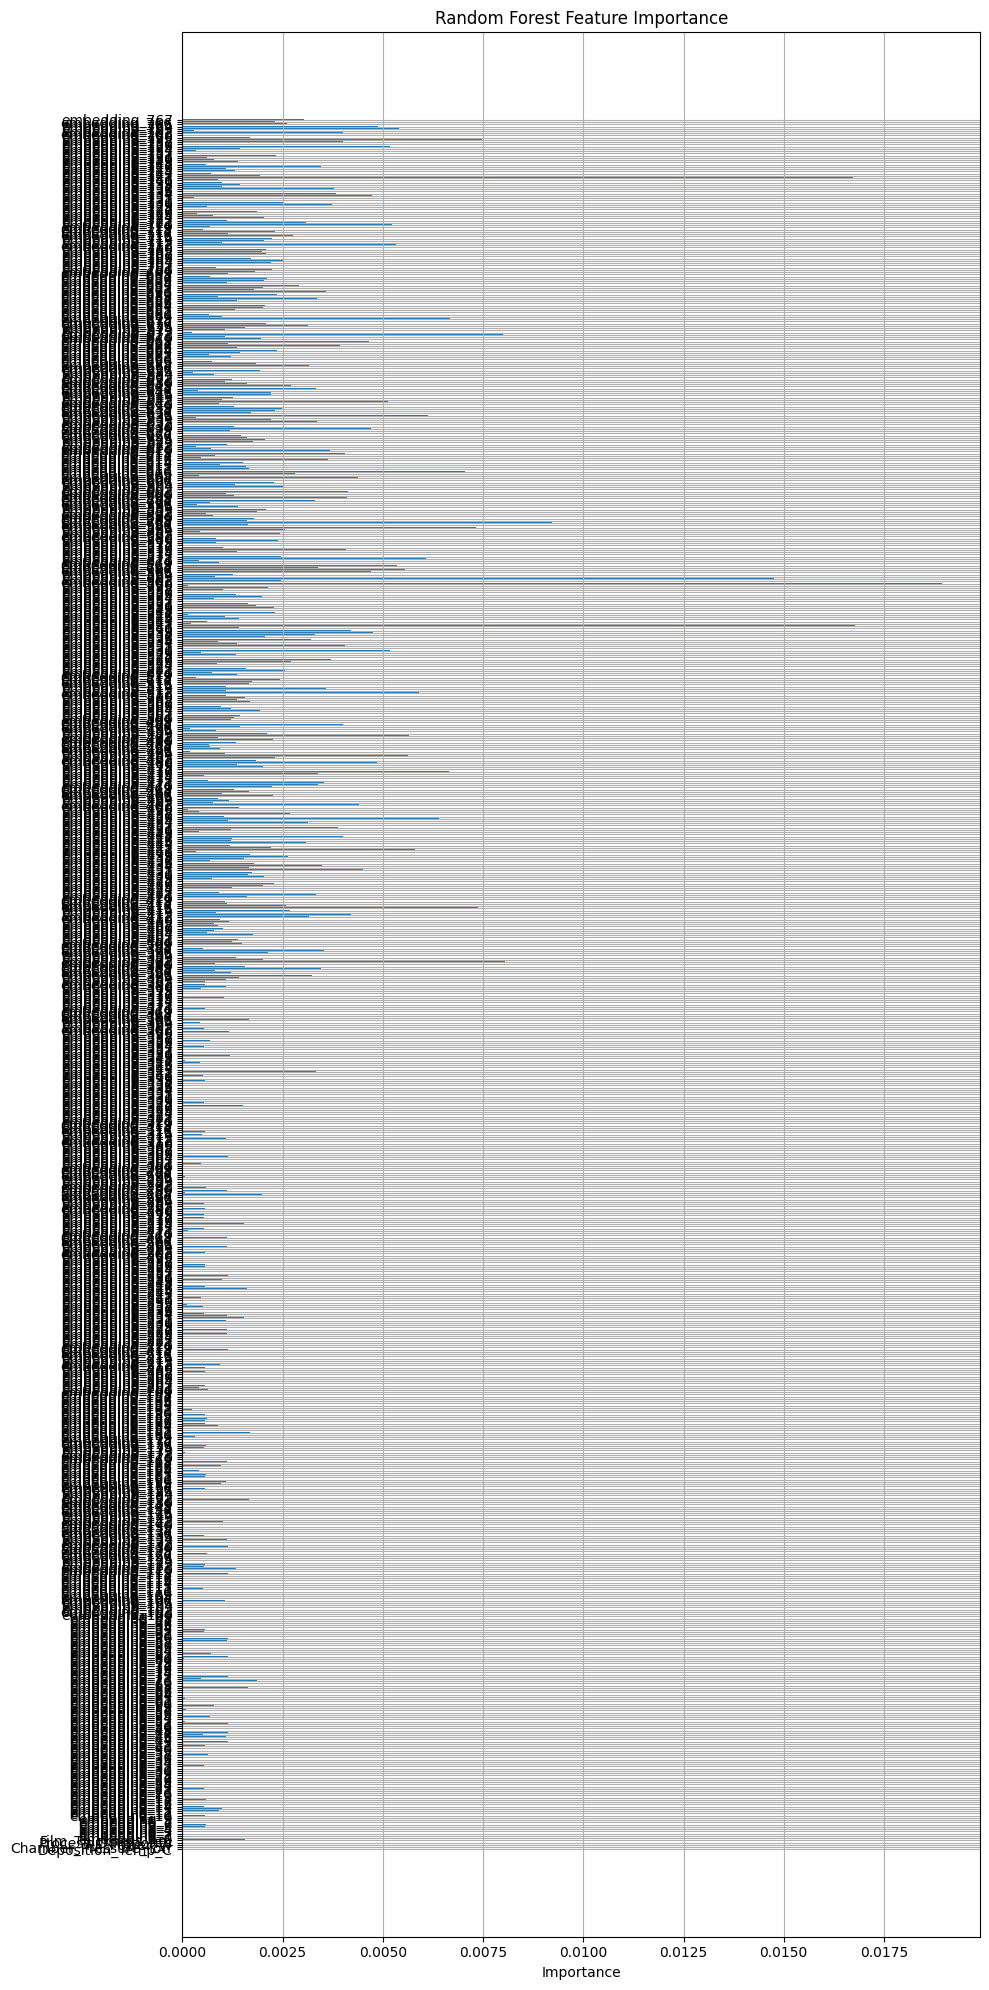

In [ ]:
#🧠 Optional: Feature Importance (for LSS Interpretability)

import matplotlib.pyplot as plt
import numpy as np

feature_importance = clf.feature_importances_

# Update feature_cols to match the dimensions of X_scaled
# Assuming the first 5 features are the numerical ones
numerical_feature_names = ['Deposition_Temp_C', 'Chamber_Pressure_Torr',
                           'RF_Power_W', 'Process_Duration_s', 'Film_Thickness_nm']
embedding_feature_names = [f'embedding_{i}' for i in range(X_scaled.shape[1] - len(numerical_feature_names))]
all_feature_names = numerical_feature_names + embedding_feature_names


plt.figure(figsize=(10, 20)) # Increase figure size to accommodate more features
plt.barh(all_feature_names, feature_importance)
plt.xlabel("Importance")
plt.title("Random Forest Feature Importance")
plt.grid(True)
plt.tight_layout()
plt.show()

Step: Prioritize Misclassified Samples for Review (Active Learning)

In [ ]:
df_test = X_test.copy()
df_test['True_Label'] = y_test
df_test['Predicted_Label'] = y_pred
df_test['Misclassified'] = df_test['True_Label'] != df_test['Predicted_Label']

# Sort misclassified samples by importance (e.g., probability margin, entropy if you store it)
misclassified_samples = df_test[df_test['Misclassified'] == True]


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
# Find rows where predicted != true
misclassified = df[df['Propagated_Label_Name'] != df['Root_Cause_5M']]

# View top misclassifications
misclassified[['Run_ID', 'Root_Cause_5M', 'Propagated_Label_Name', 'Operator_Annotation']].head(20)


In [ ]:
# 🔍 Step 1: Identify misclassified rows
misclassified = df[df['Propagated_Label_Name'] != df['Root_Cause_5M']]

# 🔍 Step 2: Select important columns for inspection
misclassified_subset = misclassified[['Run_ID', 'Root_Cause_5M', 'Propagated_Label_Name', 'Operator_Annotation']]

# 👁️ Step 3: Display first few rows (optional)
print(misclassified_subset.head(20))

# 💾 Step 4: Optional — Save to Excel or CSV
misclassified_subset.to_excel("Misclassified_RCA_Logs.xlsx", index=False)
# OR
misclassified_subset.to_csv("Misclassified_RCA_Logs.csv", index=False)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Use full dataset with propagated labels
X_train, X_test, y_train, y_test = train_test_split(X_scaled, df['Propagated_Label'], test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


In [ ]:
import joblib
joblib.dump(clf, 'final_rf_model_propagated.pkl')


In [ ]:
# Filter X_scaled to get unlabeled data
X_unlabeled_scaled = X_scaled[~true_mask]

In [ ]:
y_unlabeled_pred = clf.predict(X_unlabeled_scaled)